In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
%matplotlib notebook

In [2]:
# parameters
N = 5
Rsi = 1
I_0 = 1
S_0 = 4

# Build Q Matrix
Q = np.zeros((N + 1, N + 1))

for i in range(1, N): # number of infectives
    Q[i, i - 1] = Rsi * i * (N - i)
    Q[i, i] = - (Rsi * i * (N - i))

In [3]:
# Calculating the formulaic versions
four = lambda t : np.exp(-4 * t)
six = lambda t : np.exp(-6 * t) 
probs = lambda t : [four(t), 
                    2 * (four(t) - six(t)), 
                    6 * (four(t) - six(t) - (2 * t * six(t))),
                    36 * ((t * four(t)) - four(t) + six(t) + (t * six(t))),
                    1 + (27 * four(t)) - (36 * t * four(t)) - (28 * six(t)) - (24 * t * six(t))
                   ]

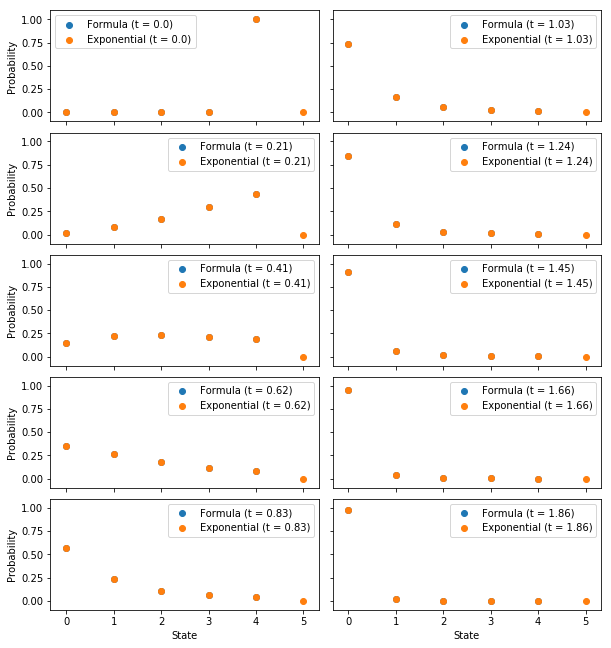

In [4]:
axIndices = [(row, col) for col in range(2) for row in range(5)]

ts = np.linspace(0, 6, num=len(axIndices) + 20)
Ps = [expm(t * Q) for t in ts]

fig, axis = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(9, 9))

for index, t, P in zip(axIndices, ts, Ps):
    # Get the S_0th row of the current probability matrix
    numerical = P[S_0, :]
    form = list(reversed(probs(t)))
    axis[index].scatter(range(len(form)), form, label="Formula (t = {})".format(round(t, 2)))
    axis[index].scatter(range(len(numerical)), numerical, label="Exponential (t = {})".format(round(t, 2)))
    axis[index].legend()
    if index[1] == 0:
        axis[index].set_ylabel("Probability")
    if index[0] == 4:
        axis[index].set_xlabel("State")

plt.subplots_adjust(left=0.1, bottom=0.05, right=0.95, top=0.975, hspace=0.1, wspace=0.05)

plt.savefig("images\\q3_a_i")

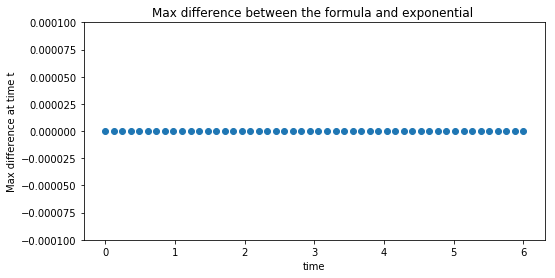

In [5]:
ts = np.linspace(0, 6, num=50)
Ps = [expm(t * Q) for t in ts]

plt.figure(figsize=(8,4))

maxDiff = []

for t, P in zip(ts, Ps):
    numerical = P[S_0, :]
    form = list(reversed(probs(t)))
    maxDiff.append(max([abs(a - b) for a, b in zip(numerical, form)]))

plt.subplots_adjust(right=0.95, left=0.15)
plt.scatter(ts, maxDiff)
plt.ylim((-0.0001, 0.0001))
plt.title("Max difference between the formula and exponential ")
plt.ylabel("Max difference at time t")
plt.xlabel("time")
plt.savefig("images\\q3_a_ii")